# Annalyse exploratoire demande de valeur foncière 

## Contexte
La base de données Demande de Valeur Foncière (DVF) fournis par la Direction générale des Finances publiques (DGFiP) recensent des informations sur les **mutations** onéreuses immobilières.
des cinq dernières années, enregistrées par le **service de la publicité foncière**.  


Pour construire DVF, la DGFIP compile à la fois des données provenant de la base **Fichier Informatisé des Données Juridiques Immobilières** (FIDJI) et de la base **Mise à Jour des Informations Cadastrales** (MAJIC) au sein de la **Base nationale des données patrimoniales** (BNDP). C'est ensuite l'extraction d'une partie des informations contenues dans BNDP qui donne lieu à DVF.  

### Définitions
**Service de la publicité foncière:** Service public qui gère les informations relatives aux transactions immobilières(successions, ventes, dons etc...).  
**Mutation:** Une mutation est une opération juridique qui permet le changement de propriétaire d'un bien immobilier.  
**MAJIC**:La base MAJIC fournit à la fois des informations sur la parcelle (surface terrain, localisation, nombre de pièces etc...) et sur le propriétaire.   
**FIDJI:** La base FIDJI fournit des informations sur la situation juridique des propriétés (L'historique des ventes/sucessions/dons, identitié acheteurs / vendeurs, prix de vente etc...).  
**Local :** Un local est différencié, par la DGFiP, en 4 catégories selon sa forme physique (Maison, appartement, industrie ou commerce, dépendance).  



### Point positifs 
Un des avantages notable de DVF réside dans le fait que celui-ci est disponible gratuitement en open data.
Les bases de données comparables, c'est à dire **PERVAL et BIEN**, tenues par des notaires, sont disponibles quand à eux uniquement disponibles pour les ayants droits et contre paiement. 
DVF est aussi réputé exhaustive, en effet avec 35 champs provenant de MAJIC et de FIDJI il permet d'annalyser de manière fine les mutations et les caractéristiques des biens associés.
La couverture temporelle et spatiale peut être qualifiée de bonne, DVF couvre l'ensemble des mutations de 2014 à 2021 (S1 2022 disponible)
sur le territoire Francais (Mayotte et Alsace Morelle exclu). 


### Point négatifs
L'exhaustivité de DVF et sa taille rend difficile l'accès aux personnes non experte. 

### Interpretation
**Les types de locaux**:
- Appartement
- Maison
- Industrie 
- Commerce 
Une mutation identifie l'ensemble des biens 

**Notion de lot**  
Si le bien objet de la mutation fait partie d'une copropriété, nombre de lots et le
numéro de lot dans la limite de cinq lots par mutation

## Traitement du fichier

In [40]:
# Structure de données
import pandas as pd

# Visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du fichier
dvf_file = "demande-de-valeurs-foncieres-geolocalisee-a-la-reunion.csv"
data_raw = pd.read_csv(dvf_file,
            sep=";",
            low_memory = False)

## Première annalyse 

In [2]:
# Quels sont les colonnes? 
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492416 entries, 0 to 492415
Data columns (total 46 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Identifiant de mutation (Etalab)              492416 non-null  object 
 1   Date de la mutation                           492416 non-null  object 
 2   Numéro de disposition                         492416 non-null  int64  
 3   Nature de la mutation                         492416 non-null  object 
 4   Valeur foncière                               491226 non-null  float64
 5   Numéro de voie                                398673 non-null  float64
 6   Suffixe du numéro (bis/ter)                   45066 non-null   object 
 7   Nom de la voie                                488874 non-null  object 
 8   Code Fantoir/Rivoli de la voie                489613 non-null  object 
 9   Code postal                                   48

In [3]:
# Quels sont les valeurs prises par : nature_mutation
data_raw["Nature de la mutation"].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Expropriation', 'Echange',
       'Adjudication'], dtype=object)

In [4]:
# Quels sont les valeurs prises par : Type de local
data_raw["Type de local"].unique()

array(['Maison', nan, 'Appartement', 'Dépendance',
       'Local industriel. commercial ou assimilé'], dtype=object)

In [5]:
# Quels sont les valeurs prises par : Nature de culture
data_raw["Nature de culture"].unique()

array(['sols', 'terrains a bâtir', nan, 'terres', 'bois', 'landes',
       "terrains d'agrément", 'prés', 'jardins', 'taillis simples',
       'pâtures', 'vergers', 'futaies résineuses', 'vignes',
       'futaies feuillues', 'eaux'], dtype=object)

In [6]:
# Quels sont les valeurs prises par : Code de la nature de culture
data_raw["Code de la nature de culture"].unique()

array(['S', 'AB', nan, 'T', 'B', 'L', 'AG', 'P', 'J', 'BT', 'PA', 'VE',
       'BR', 'VI', 'BF', 'E'], dtype=object)

In [7]:
# Nombre de mutation distincts 
data_raw["Identifiant de mutation (Etalab)"].describe()


count           492416
unique           55301
top       2020-1411804
freq              2160
Name: Identifiant de mutation (Etalab), dtype: object

In [43]:
# Quel est la transaction ayant impliquée le plus de mutation 
id_max_transaction = 2020-1411804

# Quels sont les biens que il a acheté ? 

max_transaction_number = data_raw[data_raw["Identifiant de mutation (Etalab)"] == "2020-1411804"]

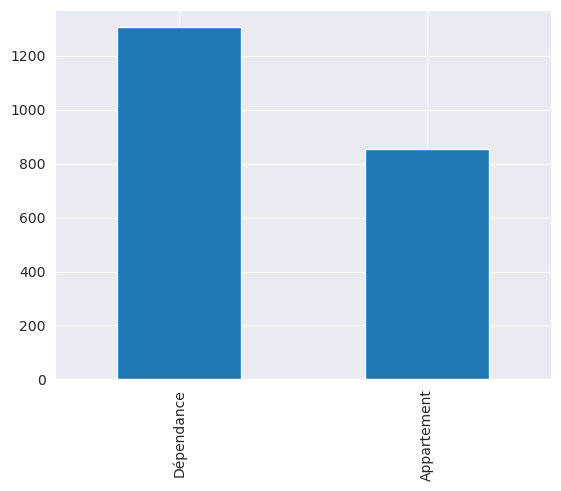

In [44]:

# Quel est la nature de ces bien exactement
sns.set_style("darkgrid")
fig, ax = plt.subplots()
max_transaction_number["Type de local"].value_counts().plot(kind = "bar", ax = ax)
plt.show()

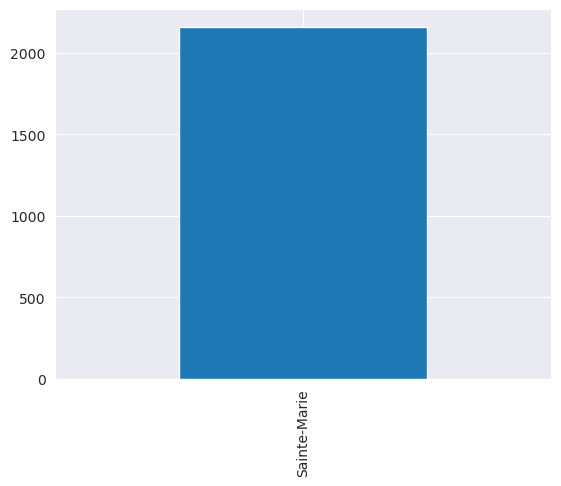

In [10]:
# Dans quels commune exactement ? 
max_transaction_number["Nom de la commune"].value_counts().plot(kind = "bar")
plt.show()

In [37]:
data_raw.groupby(["Identifiant de mutation (Etalab)","Surface du terrain","Valeur foncière"]).count()

,,,Date de la mutation,Numéro de disposition,Nature de la mutation,Numéro de voie,Suffixe du numéro (bis/ter),Nom de la voie,Code Fantoir/Rivoli de la voie,Code postal,Code INSEE de la commune,Nom de la commune,...,Code de la nature de culture spéciale,Nature de culture spéciale,Longitude,Latitude,Code Officiel EPCI,Nom Officiel EPCI,Nom du département,Code INSEE de la région,Nom de la région,Géolocalisation
Identifiant de mutation (Etalab),Surface du terrain,Valeur foncière,,,,,,,,,,,,,,,,,,,,,
2014-1048558,456.0,230000.0,4,4,4,4,0,4,4,4,4,4,...,0,0,4,4,4,4,4,4,4,4
2014-1048559,221.0,9147.0,2,2,2,0,0,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
2014-1048563,888.0,304950.0,4,4,4,4,4,4,4,4,4,4,...,0,0,4,4,4,4,4,4,4,4
2014-1048568,404.0,85000.0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2014-1048569,655.0,185000.0,4,4,4,4,0,4,4,4,4,4,...,0,0,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-1238976,105.0,40000.0,1,1,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2021-1238977,465.0,65350.4,1,1,1,1,0,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,1
2021-1238978,930.0,75000.0,4,4,4,0,0,4,4,4,4,4,...,0,0,4,4,4,4,4,4,4,4


In [27]:
# Selection des ventes uniquements
mask1 = data_raw["Nature de la mutation"] == "Vente"

# Selection des Ventes concernant des maisons ou des appartements
mask2 = (data_raw["Type de local"] == "Maison") | (data_raw["Type de local"] == "Appartement")

In [ ]:
data_raw.loc[mask1 & mask2,"Type de local"].unique()

array(['Maison', 'Appartement'], dtype=object)

## Nettoyage du fichier 

### 